<a href="https://colab.research.google.com/github/MukRodrigues/Simulacao-difusao-reacao/blob/main/GITHUB_Simulacao_equacao_difusao_reacao_facilitado_met_explicito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# pacotes e funções usados
import numpy as np
from numpy import exp, sin, pi, shape
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

from ipywidgets import interact, interactive, fixed, widgets
from IPython.display import display

## Simulação


In [32]:
# Parâmetros ajustados para estabilidade
L = 1
T = 1

h = 0.1  # Redução do espaçamento dx para estabilidade
k = 0.0002  # Redução do espaçamento dt para estabilidade
steps = int(T / k)

# Malha
x = np.arange(0, L + h, h)
x0 = (min(x) + max(x))/2
t = np.arange(0, T + k, k)
n = len(x)
m = len(t)


#### Parâmetros

In [33]:
# Parâmetros do modelo
D0 = 0.5
k1 = 1.7
k2 = 0.1*k1
r1 = .69  # Redução da taxa de crescimento para evitar instabilidade
r2 = 0.15*r1*0
N0 = 10

# Períodos
pr = T/3.5
pk = T/2.5

# Funções do problema
K = k1 + k2 * np.sin(2 * np.pi * t / pk)
r = r1 + r2 * np.sin(2 * np.pi * t / pr)

# Difusividade D(x,t) e sua derivada Dx
D = np.zeros((n, m))
Dx = np.zeros((n, m))
for i in range(n):
    for j in range(m):
        D[i, j] = D0 * (exp(-K[j]*(x0 - x[i])**2 ))
        Dx[i, j] =  (-2)*(K[j])*(-x0 + x[i])* D[i,j]

# Matrizes A1 e A2
A1 = np.zeros((n, m))
A2 = np.zeros((n, m))
for i in range(n):
    for j in range(m):
        A1[i, j] = k * Dx[i, j] / (2 * h)
        A2[i, j] = k * D[i, j] / (h ** 2)


In [34]:
# Condições Iniciais e de Contorno
rho = np.zeros((n, m))  # Matriz da densidade populacional
rho[0, :] = 0
rho[-1, :] = 0
rho[:, 0] = N0 / (2 * L)
u = 2
# Atualização da densidade usando esquema explícito
for j in range(m - 1):
    for i in range(1, n - 1):
        rho[i, j + 1] = (
            rho[i + 1, j] * (A1[i, j] + A2[i, j])
            + rho[i, j] * (1 - 2 * A2[i, j] + A1[i, j])
            + rho[i - 1, j] * (A2[i, j] - A1[i, j])
            + r[j] * k * rho[i, j]**u
        )

#### Gráfico

## Densidade

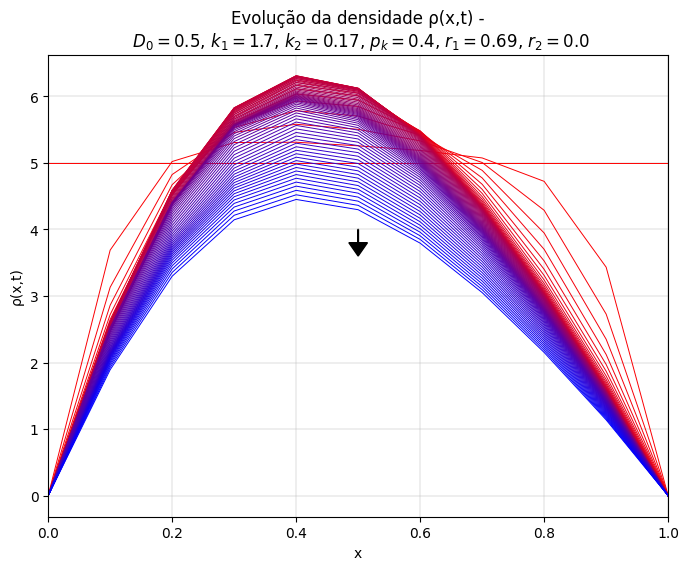

In [39]:
# Plotagem da solução
plt.figure(figsize=(8, 6))
colors = [(1 - i/m, 0, i/m) for i in range(m)]

for j in range(0, m, max(1, m // 70)):
    plt.plot(x, rho[:, j], label=f"t = {t[j]:.2f}",linewidth=0.7, color=colors[j])

#, $p_r=${round(pr,2)}
plt.xlabel("x")
plt.ylabel("ρ(x,t)")
plt.title(f"Evolução da densidade ρ(x,t) -\n $D_0=${D0}, $k_1 =${k1}, $k_2 =${round(k2,2)}, $p_k=${round(pk,2)}, $r_1 =${r1}, $r_2 =${round(r2,2)}")
plt.xlim(0,1)
#plt.ylim(-0.5,13)
plt.grid(linestyle='-', linewidth=0.3)
plt.arrow(0.5,4.0,0,-0.2, head_width=0.03,head_length=0.2, color='black') #setinha
#plt.legend()

#plt.savefig('difusao-_variavel_crecimento_facilitado.png')  #para salvar a imagem
plt.show()